### Data wrangling for the blue, green and red lines
#### Avaiable in:
https://transparencia.metrosp.com.br/sites/default/files/Entrada%20de%20Passageiros%20por%20Llinha%20-%202023.csv
https://transparencia.metrosp.com.br/sites/default/files/Entrada%20de%20Passageiros%20por%20Linha%20-%202022_7.csv
https://transparencia.metrosp.com.br/sites/default/files/Entrada%20de%20Passageiros%20por%20Linha%20-%202021.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading files from 2021 to 2023 to lines blue(1), green(2), red(3) and silver(15).
At the end the df will be conatenate into a single file including the columns 'line' and 'year'.
The column names in this df are:

- month (abreviation in portuguese)
- total -> total passengers by month in thousands
- mdu -> mean passangers working days in thousands
- msa -> mean passangers saturdays in thousands
- mdo -> mean passangers sundays in thousands
- max -> daily max passangers in thousands

In [2]:
f2021 = 'Entrada de Passageiros por Linha - 2021.csv'

df_blue = pd.read_csv(f2021, encoding='latin1', sep=';',  thousands='.',
                 skiprows=6, nrows=12,usecols=[0,1,2,3,4,5], names=['month','total', 'mdu', 'msa', 'mdo', 'max'])

df_green = pd.read_csv(f2021, encoding='latin1', sep=';', thousands='.',
                 skiprows=6, nrows=12,usecols=[7,8,9,10,11,12], names=['month','total', 'mdu', 'msa', 'mdo', 'max'])

df_red = pd.read_csv(f2021, encoding='latin1', sep=';',  thousands='.',
                 skiprows=25, nrows=12,usecols=[0,1,2,3,4,5], names=['month','total', 'mdu', 'msa', 'mdo', 'max'])

df_silver = pd.read_csv(f2021, encoding='latin1', sep=';', thousands='.',
                 skiprows=25, nrows=12,usecols=[7,8,9,10,11,12], names=['month','total', 'mdu', 'msa', 'mdo', 'max'])

df_blue['line'] = int(1)
df_green['line'] = int(2)
df_red['line'] = int(3)
df_silver['line'] = int(15)

df_blue['year'] = int(2021)
df_green['year'] = int(2021)
df_red['year'] = int(2021)
df_silver['year'] = int(2021)

df2021 = pd.concat([df_blue,df_green,df_red,df_silver])

In [3]:
f2022 = 'Entrada de Passageiros por Linha - 2022_7.csv'

df_blue = pd.read_csv(f2022, encoding='latin1', sep=';',  thousands='.',
                 skiprows=6, nrows=12,usecols=[0,1,2,3,4,5], names=['month','total', 'mdu', 'msa', 'mdo', 'max'])

df_green = pd.read_csv(f2022, encoding='latin1', sep=';', thousands='.',
                 skiprows=6, nrows=12,usecols=[7,8,9,10,11,12], names=['month','total', 'mdu', 'msa', 'mdo', 'max'])

df_red = pd.read_csv(f2022, encoding='latin1', sep=';',  thousands='.',
                 skiprows=25, nrows=12,usecols=[0,1,2,3,4,5], names=['month','total', 'mdu', 'msa', 'mdo', 'max'])

df_silver = pd.read_csv(f2022, encoding='latin1', sep=';', thousands='.',
                 skiprows=25, nrows=12,usecols=[7,8,9,10,11,12], names=['month','total', 'mdu', 'msa', 'mdo', 'max'])

df_blue['line'] = int(1)
df_green['line'] = int(2)
df_red['line'] = int(3)
df_silver['line'] = int(15)

df_blue['year'] = int(2022)
df_green['year'] = int(2022)
df_red['year'] = int(2022)
df_silver['year'] = int(2022)

df2022 = pd.concat([df_blue,df_green,df_red,df_silver])

In [4]:
f2023 = 'Entrada de Passageiros por Llinha - 2023.csv'

df_blue = pd.read_csv(f2023, encoding='latin1', sep=';',  thousands='.',
                 skiprows=6, nrows=12,usecols=[0,1,2,3,4,5], names=['month','total', 'mdu', 'msa', 'mdo', 'max'])

df_green = pd.read_csv(f2023, encoding='latin1', sep=';', thousands='.',
                 skiprows=6, nrows=12,usecols=[7,8,9,10,11,12], names=['month','total', 'mdu', 'msa', 'mdo', 'max'])

df_red = pd.read_csv(f2023, encoding='latin1', sep=';',  thousands='.',
                 skiprows=25, nrows=12,usecols=[0,1,2,3,4,5], names=['month','total', 'mdu', 'msa', 'mdo', 'max'])

df_silver = pd.read_csv(f2023, encoding='latin1', sep=';', thousands='.',
                 skiprows=25, nrows=12,usecols=[7,8,9,10,11,12], names=['month','total', 'mdu', 'msa', 'mdo', 'max'])

df_blue['line'] = int(1)
df_green['line'] = int(2)
df_red['line'] = int(3)
df_silver['line'] = int(15)

df_blue['year'] = int(2023)
df_green['year'] = int(2023)
df_red['year'] = int(2023)
df_silver['year'] = int(2023)

df2023 = pd.concat([df_blue,df_green,df_red,df_silver])

Data for 2023 is avaible until April. This will generate nan from mai and above so we'll drop those rows.
Also the * in the month are eliminated. And the month names modified for standart English.

In [5]:
print(df2023.isna().value_counts())
df = pd.concat([df2021, df2022, df2023])
df = df.dropna()
df[['month']] = df[['month']].replace({'\*': ''}, regex=True)
mapping = {'Jan':'Jan','Fev':'Feb','Mar':'Mar', 'Abr':'Apr', 'Mai':'May', 'Jun':'Jun','Jul':'Jul','Ago':'Aug',
           'Set':'Sep', 'Out':'Oct', 'Nov':'Nov','Dez':'Dez' }
          
df['month'] = df['month'].map(mapping)
df['month'] = pd.Categorical(df['month'], ordered=True)

df.head(12)

month  total  mdu    msa    mdo    max    line   year 
False  True   True   True   True   True   False  False    32
       False  False  False  False  False  False  False    16
Name: count, dtype: int64


,month,total,mdu,msa,mdo,max,line,year
0,Jan,11572.0,483.0,263.0,157.0,512.0,1,2021
1,Feb,11870.0,509.0,304.0,158.0,526.0,1,2021
2,Mar,9795.0,398.0,192.0,100.0,531.0,1,2021
3,Apr,9192.0,388.0,204.0,109.0,449.0,1,2021
4,May,11414.0,459.0,295.0,145.0,476.0,1,2021
5,Jun,12216.0,476.0,311.0,159.0,497.0,1,2021
6,Jul,12800.0,489.0,318.0,166.0,517.0,1,2021
7,Aug,13887.0,531.0,336.0,173.0,553.0,1,2021
8,Sep,14620.0,580.0,373.0,202.0,600.0,1,2021
9,Oct,15384.0,614.0,403.0,196.0,652.0,1,2021


In [6]:
df[['total', 'mdu', 'msa', 'mdo', 'max']].describe()

,total,mdu,msa,mdo,max
count,112.000000,112.000000,112.000000,112.000000,112.000000
mean,11228.223214,451.000000,272.482143,153.276786,481.892857
std,7147.833902,283.327112,185.654284,103.786789,300.846354
min,831.000000,35.000000,17.000000,8.000000,39.000000
25%,4298.000000,183.000000,84.250000,45.250000,206.500000
50%,11562.500000,475.500000,239.500000,149.000000,499.500000
75%,17704.000000,707.000000,453.250000,242.000000,755.000000
max,22792.000000,889.000000,642.000000,348.000000,973.000000


The section above do not pretend make any analysis but take a quick look at the data to verify its integrity.

- kde distribution for TOTAL number of passengers by year

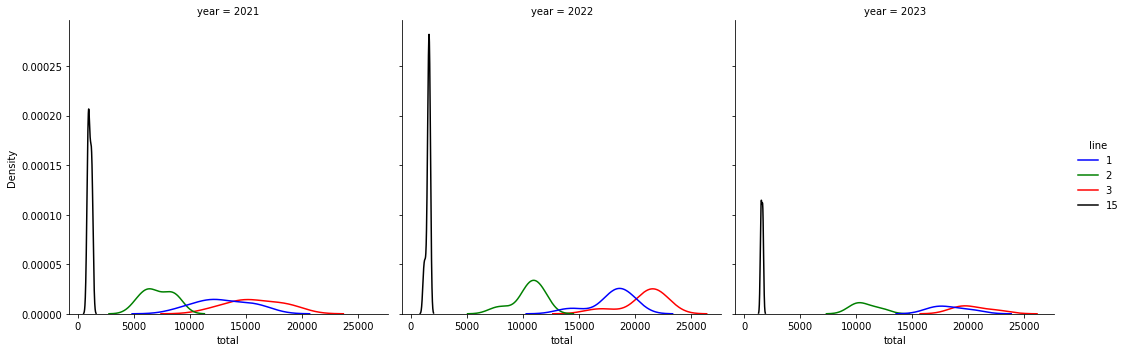

In [7]:
chart = sns.displot(data = df, x='total', hue='line', palette=['blue', 'green', 'red', 'black'], 
                    col='year',kind='kde')

- kde distribution for MDU (mean of working days) number of passengers by year

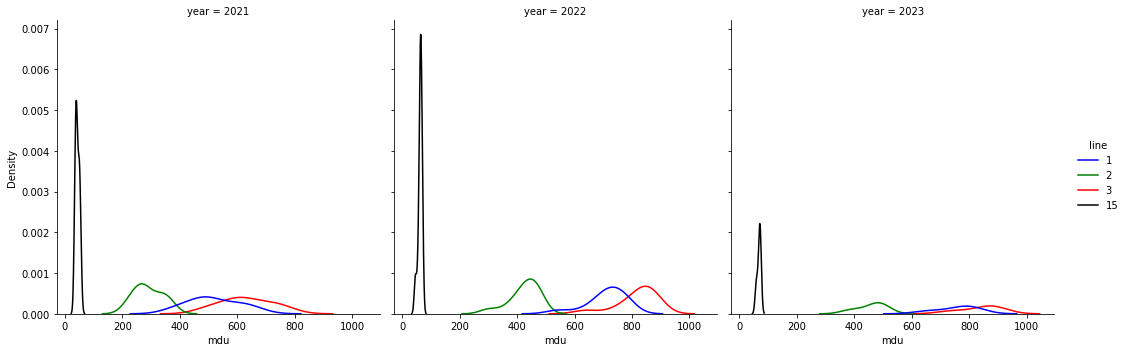

In [8]:
chart = sns.displot(data = df, x='mdu', hue='line', palette=['blue', 'green', 'red', 'black'], 
                    col='year',kind='kde')

- kde distribution for MSA (mean of Saturdays) number of passengers by year

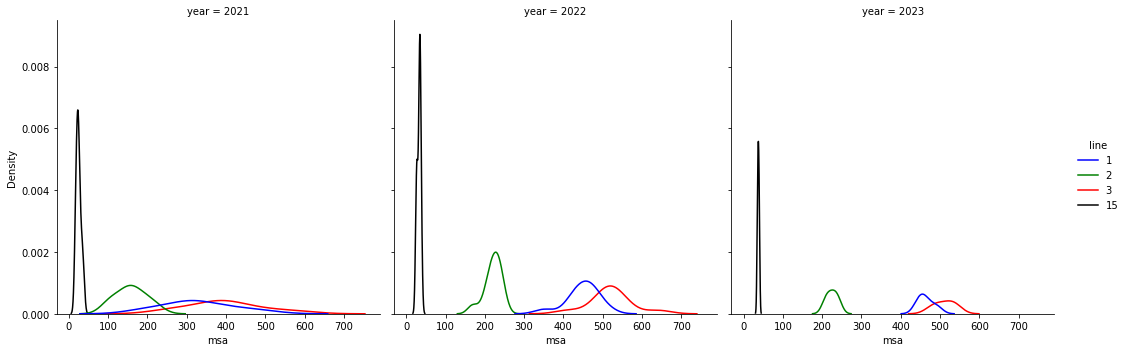

In [9]:
chart = sns.displot(data = df, x='msa', hue='line', palette=['blue', 'green', 'red', 'black'], 
                    col='year',kind='kde')

- kde distribution for MDO (mean of Sundays) number of passengers by year

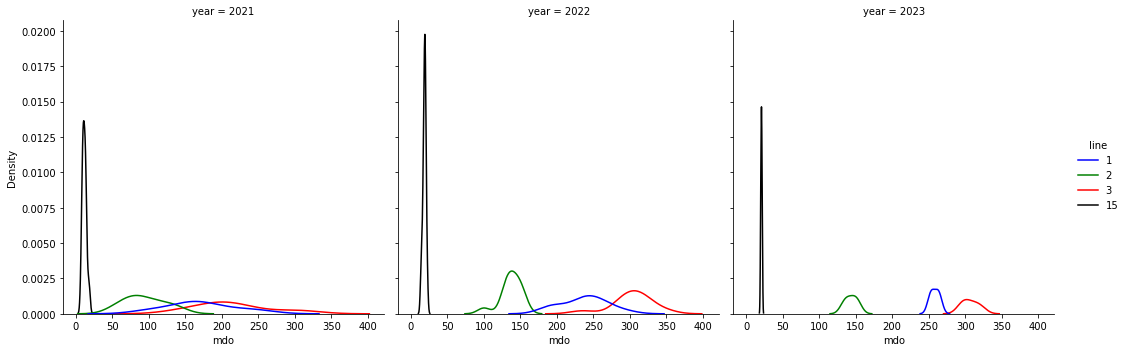

In [10]:
chart = sns.displot(data = df, x='mdo', hue='line', palette=['blue', 'green', 'red', 'black'], 
                    col='year',kind='kde')

- kde distribution for MAX (max passengers in a day) number of passengers by year

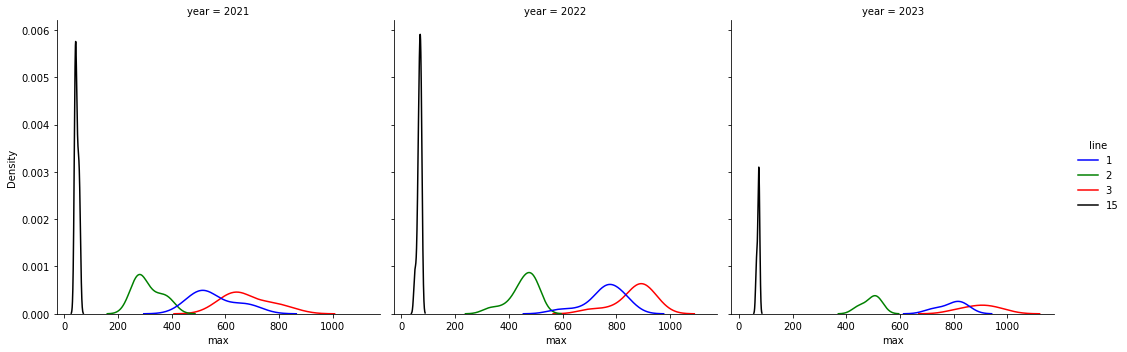

In [11]:
chart = sns.displot(data = df, x='max', hue='line', palette=['blue', 'green', 'red', 'black'], 
                    col='year',kind='kde')

Text(0.5, 1.0, '2023')

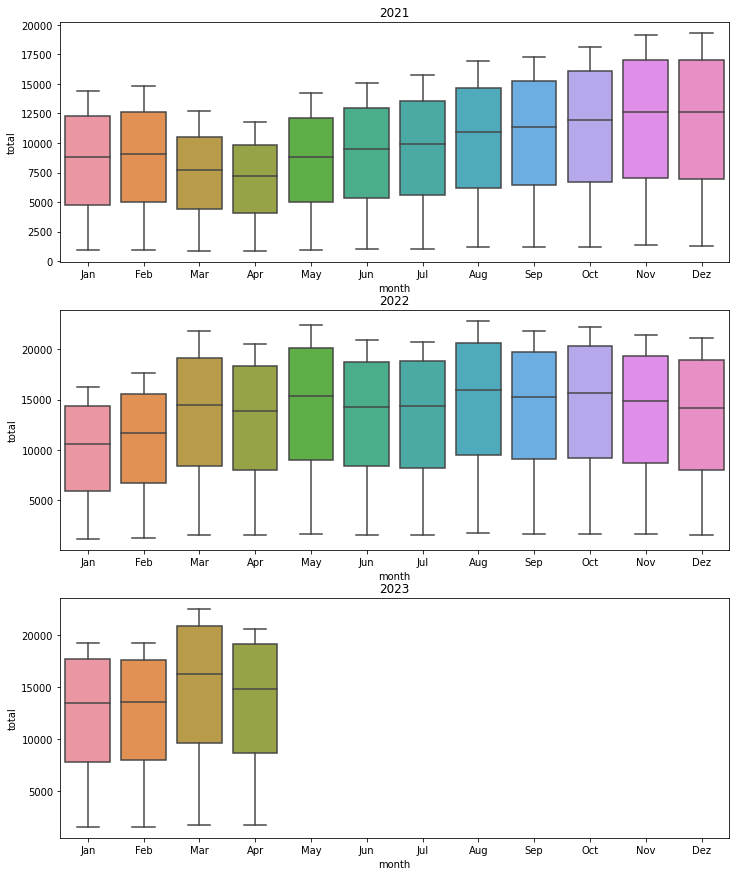

In [39]:
fig, ax = plt.subplots(3,1,figsize=(12,15))
sns.boxplot(data=df[df['year']==2021], x ='month', y='total', order=df['month'][0:12], ax=ax[0])
sns.boxplot(data=df[df['year']==2022], x ='month', y='total', order=df['month'][0:12] ,ax=ax[1])
sns.boxplot(data=df[df['year']==2023], x ='month', y='total', order=df['month'][0:12] ,ax=ax[2])
ax[0].set_title('2021')
ax[1].set_title('2022')
ax[2].set_title('2023')